# Load Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')
df = pd.read_csv('data/kc_house_data.csv')

# check the columns and first few rows
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# Explore the Data

In [2]:
# get the total counts and data types for each column
print(df.shape)
print("\n")
df.info()

(21597, 21)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ M

In [3]:
# Get descriptions of each column
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
# look for duplicates
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicates: ", len(duplicate_rows_df))

Number of duplicates:  0


In [5]:
# preview 5 most frequent values of a col in a loop, for each string col.
# looking for extraneous values and getting to know the data
for col in df.columns:
    try:
        print(col, df[col].value_counts()[:5])
    except:
        print(col, df[col].value_counts())
    print('\n')

id 795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
Name: id, dtype: int64


date 6/23/2014    142
6/26/2014    131
6/25/2014    131
7/8/2014     127
4/27/2015    126
Name: date, dtype: int64


price 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64


bedrooms 3    9824
4    6882
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64


bathrooms 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
Name: bathrooms, dtype: int64


sqft_living 1300    138
1400    135
1440    133
1660    129
1010    129
Name: sqft_living, dtype: int64


sqft_lot 5000    358
6000    290
4000    251
7200    220
7500    119
Name: sqft_lot, dtype: 

In [6]:
# replace extraneous value '?' in 'sqft_basement' col to equal 0 as that is mode
# convert to type to float
df.sqft_basement = df.sqft_basement.map(lambda x: '0' if x == '?' else x)
df.sqft_basement = df.sqft_basement.astype('float')

In [7]:
# see results
df.sqft_basement.value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [8]:
# check for null values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

# Scrub the Data

In [9]:
# analyze waterfront column
print(df['waterfront'].value_counts())

0.0    19075
1.0      146
Name: waterfront, dtype: int64


In [10]:
# values are either yes (1.0) or no (0.0)
# since the cells are blank, it is best to assume that the houses do not have a waterfront view
# the empty cells should be filled with 0.0
df['waterfront'].fillna(0, inplace=True)
print(df.isnull().sum())

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


In [11]:
# how much is missing from year renovated - 18%
# printed most common values so that we know what to replace the nulls with
print('Percentage of Null yr_renovated Values:', len(df[df.yr_renovated.isna()])/ len(df))
print('Number of Unique yr_renovated Values:', df.yr_renovated.nunique())
print('Number of Unique Values:', df.yr_renovated.value_counts())

Percentage of Null yr_renovated Values: 0.17789507802009538
Number of Unique yr_renovated Values: 70
Number of Unique Values: 0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64


In [12]:
# 0.0 is the mode
# a number equals the year the home was renovated and 0.0 means the home was never renovated
# we should then also assume that the blank cells mean that these homes were never renovated
# convert nan to 0.0
df.loc[df.yr_renovated.isna(), 'yr_renovated'] = 0.0

In [13]:
# see results
df.yr_renovated.value_counts()

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [14]:
# analyze view column
print(df['view'].value_counts())

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64


In [15]:
views_mean = df['view'].mean()
views_median = df['view'].median()
views_mode = df['view'].mode()
print('Viewed Mean: ', views_mean)
print('Viewed Median: ', views_median)
print('Viewed Mode: ', views_mode)

Viewed Mean:  0.23386272870808952
Viewed Median:  0.0
Viewed Mode:  0    0.0
dtype: float64


In [16]:
# both the median and mode are 0.0
# the mean rounded to the nearest whole number is also 0.0
# it is best to assume the cells were left blank because they were not viewed
# the blank num_views cells should be changed to 0.0
df['view'] = df['view'].fillna(0.0)
print(df['view'].value_counts())

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64


In [17]:
print(df.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [18]:
# see if all null values are filled
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(9), int64(11), object(1)
memory usage: 3.5+ MB


In [19]:
# Converting date to datetime
df.date = pd.to_datetime(df.date)

# EDA with Visualizations

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\15514\anaco

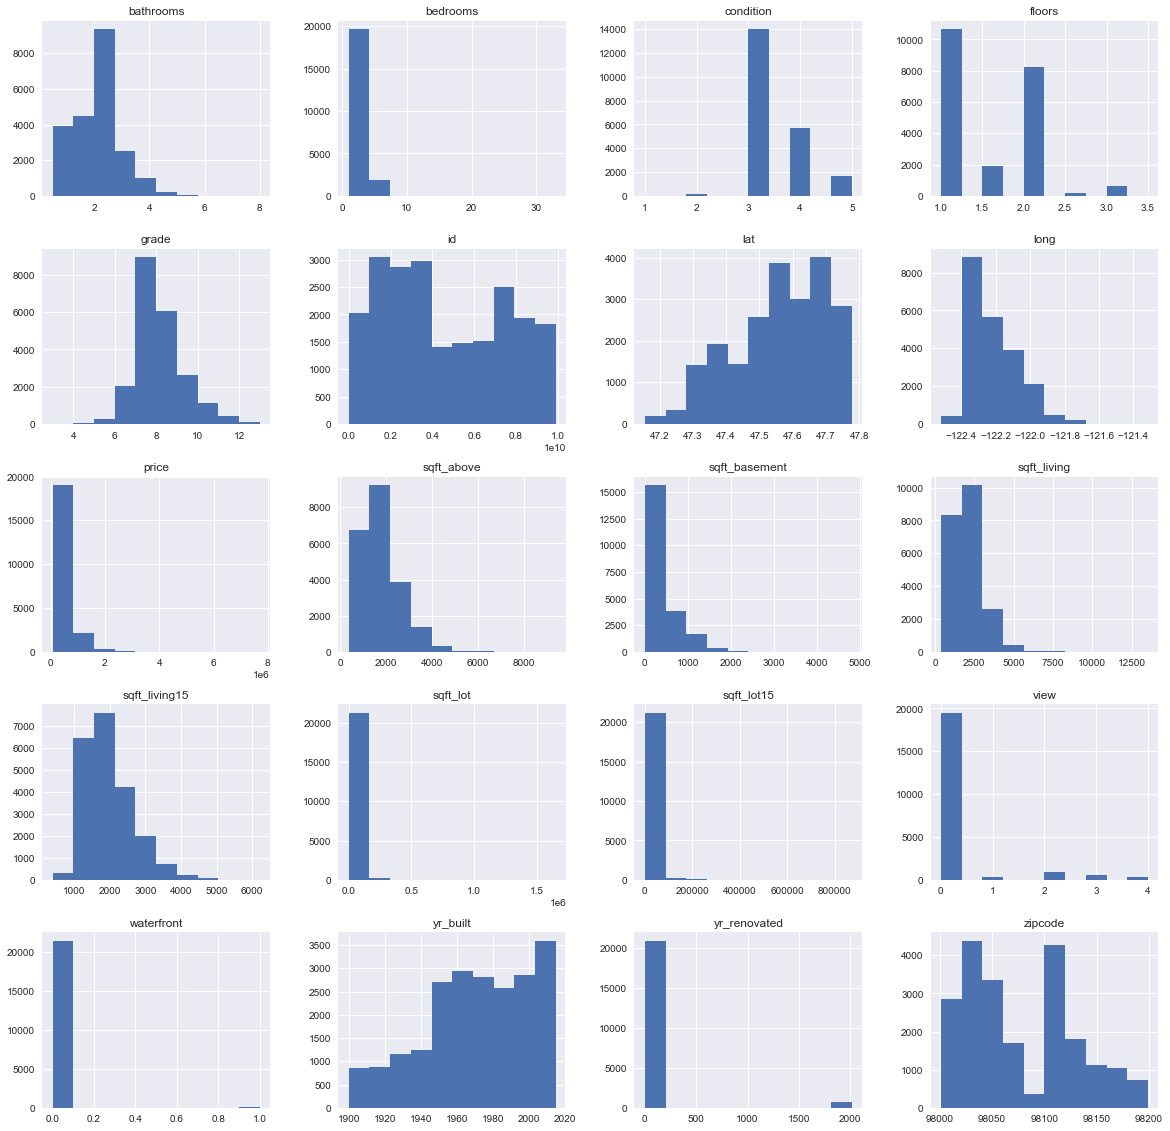

In [20]:
#look at distributions of each column
df.hist(figsize=(20,20));

In [21]:
# zipcode will be dropped
# lat and long will not be used

### Dependant Variable - Price

In [22]:
# our dependant variable will be price
# import libraries to get statistics
from numpy import mean
from numpy import std

In [23]:
std = df.price.std()
print('std: ',std)
mean = df.price.mean()
print('mean: ', mean)
std_1 = mean + std
std_1m = mean - std
print('mean +1 std: ',std_1)
print('mean -1 std: ',std_1m)

std:  367368.1401013945
mean:  540296.5735055795
mean +1 std:  907664.713606974
mean -1 std:  172928.433404185


In [24]:
df.price.min()

78000.0

In [25]:
df = df.loc[(df['price']<std_1) & (df['price']>std_1m)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19205 entries, 0 to 21596
Data columns (total 21 columns):
id               19205 non-null int64
date             19205 non-null datetime64[ns]
price            19205 non-null float64
bedrooms         19205 non-null int64
bathrooms        19205 non-null float64
sqft_living      19205 non-null int64
sqft_lot         19205 non-null int64
floors           19205 non-null float64
waterfront       19205 non-null float64
view             19205 non-null float64
condition        19205 non-null int64
grade            19205 non-null int64
sqft_above       19205 non-null int64
sqft_basement    19205 non-null float64
yr_built         19205 non-null int64
yr_renovated     19205 non-null float64
zipcode          19205 non-null int64
lat              19205 non-null float64
long             19205 non-null float64
sqft_living15    19205 non-null int64
sqft_lot15       19205 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(11)
memory usage: 3.2

In [26]:
df.price.min()

173000.0

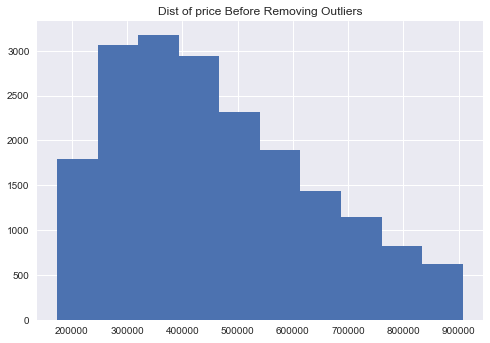

In [27]:
plt.title('Dist of price Before Removing Outliers')
df['price'].hist();

In [28]:
# data may need to be normalized when running linear model

## Housing Aspects

In [29]:
# after looking over the data, major outliers were only found in the bathrooms and bedrooms columns

### Number of Bathrooms

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


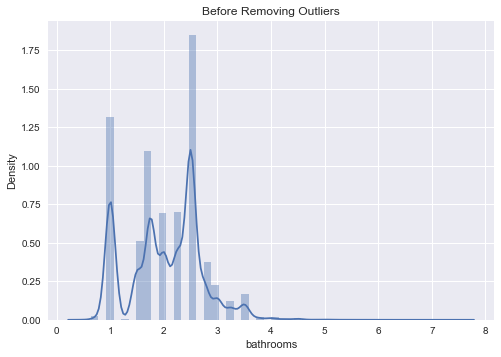

In [30]:
# identify outliers
plt.title('Before Removing Outliers')
sns.distplot(df['bathrooms'])
plt.show();

In [31]:
count = 0
bath_outliers = []
mean = np.mean(df['bathrooms'])
max_distance = np.std(df['bathrooms']) * 3

for idx, row in df['bathrooms'].T.iteritems():
    if abs(row-mean) >= max_distance:
        count += 1
        df.drop(idx, inplace=True)
count

64

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


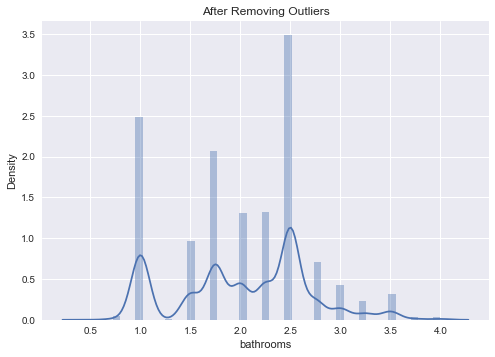

In [32]:
# identify outliers
plt.title('After Removing Outliers')
sns.distplot(df['bathrooms'])
plt.show();

### Number of Bedrooms

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


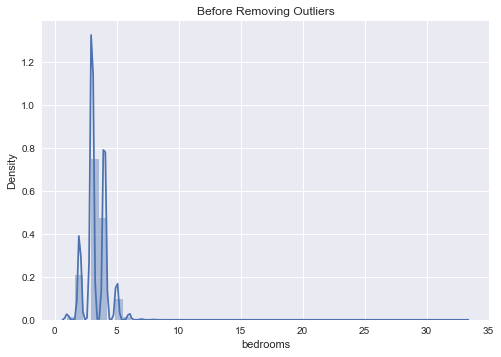

In [33]:
# identify outliers
plt.title('Before Removing Outliers')
sns.distplot(df['bedrooms'])
plt.show();

In [34]:
count = 0
bed_outliers = []
mean = np.mean(df['bedrooms'])
max_distance = np.std(df['bedrooms']) * 3

for idx, row in df['bedrooms'].T.iteritems():
    if abs(row-mean) >= max_distance:
        count += 1
        df.drop(idx,inplace=True)
count

219

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


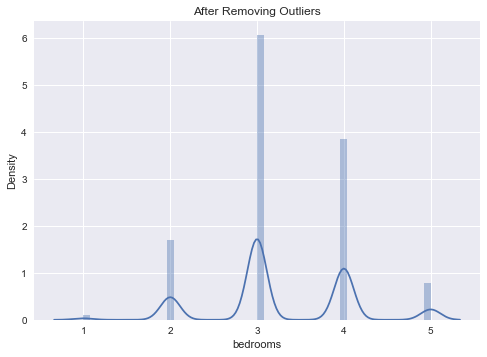

In [35]:
# identify outliers
plt.title('After Removing Outliers')
sns.distplot(df['bedrooms'])
plt.show();

In [36]:
# 187 rows were removed due to outliers in the bathrooms column
# 47 rows were removed due to outliers in the bedrooms column

# Create New Dataset

In [37]:
# to ensure our code runs smoothly and looks clean, a new dataset will be created and run in a new notebook
# drop data that is no longer needed
df.drop(columns=['id', 'date', 'zipcode', 'lat', 'long'], axis=1, inplace=True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,18922.000000,18922.000000,18922.000000,18922.000000,1.892200e+04,18922.000000,18922.000000,18922.000000,18922.000000,18922.000000,18922.000000,18922.000000,18922.000000,18922.000000,18922.000000,18922.000000
mean,458936.562308,3.279199,2.021166,1924.338971,1.429592e+04,1.469401,0.002114,0.150354,3.407462,7.485784,1668.304302,250.773914,1971.139626,56.617694,1894.156115,12298.154582
std,176907.638811,0.806139,0.664992,707.619527,3.900171e+04,0.537593,0.045930,0.592897,0.642408,0.960305,675.776919,390.373618,29.042138,331.301722,576.090633,25856.847542
min,173000.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,399.000000,651.000000
25%,315000.000000,3.000000,1.500000,1400.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1170.000000,0.000000,1952.000000,0.000000,1470.000000,5001.000000
50%,430000.000000,3.000000,2.000000,1830.000000,7.475000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1490.000000,0.000000,1975.000000,0.000000,1790.000000,7500.000000
75%,577000.000000,4.000000,2.500000,2360.000000,1.017750e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2040.000000,490.000000,1996.000000,0.000000,2240.000000,9760.750000
max,907500.000000,5.000000,4.000000,5461.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,11.000000,5450.000000,2720.000000,2015.000000,2015.000000,4670.000000,560617.000000


# Normalizing features

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 0.6999624226618297
Kurtosis: 0.41644071186801623


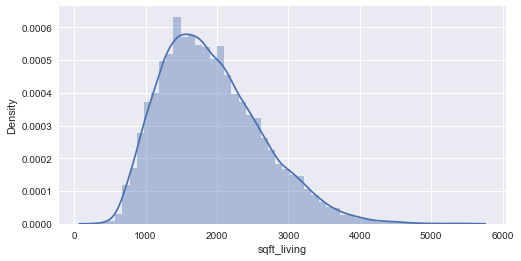

In [38]:
plt.figure(figsize=(8,4))
sns.distplot(df['sqft_living'])
print("Skewness:", df['sqft_living'].skew())
print("Kurtosis:", df['sqft_living'].kurt())

In [39]:
df['sqft_living'] = df['sqft_living'].map(lambda x: np.log(x))

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: -0.23318731861035907
Kurtosis: -0.22452382650057112


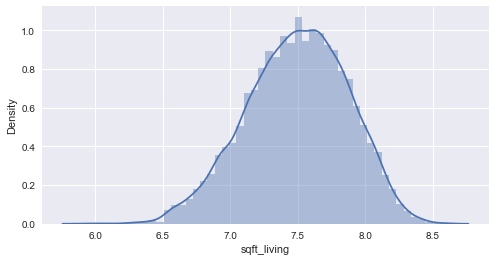

In [40]:
plt.figure(figsize=(8,4))
sns.distplot(df['sqft_living'])
print("Skewness:", df['sqft_living'].skew())
print("Kurtosis:", df['sqft_living'].kurt())

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 0.8216380021349524
Kurtosis: 0.5270554473596123


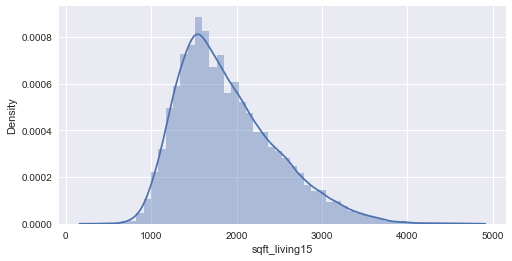

In [41]:
plt.figure(figsize=(8,4))
sns.distplot(df['sqft_living15'])
print("Skewness:", df['sqft_living15'].skew())
print("Kurtosis:", df['sqft_living15'].kurt())

In [42]:
df['sqft_living15'] = df['sqft_living15'].map(lambda x: np.log(x))

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 0.08416045929864155
Kurtosis: -0.2873532353005994


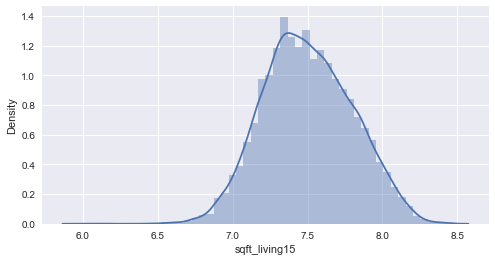

In [43]:
plt.figure(figsize=(8,4))
sns.distplot(df['sqft_living15'])
print("Skewness:", df['sqft_living15'].skew())
print("Kurtosis:", df['sqft_living15'].kurt())

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 13.721903696111355
Kurtosis: 334.84361058050376


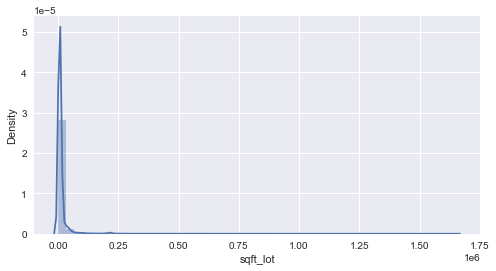

In [44]:
plt.figure(figsize=(8,4))
sns.distplot(df['sqft_lot'])
print("Skewness:", df['sqft_lot'].skew())
print("Kurtosis:", df['sqft_lot'].kurt())

In [45]:
df['sqft_lot'] = df['sqft_lot'].map(lambda x: np.log(x))

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 0.9378155424486034
Kurtosis: 3.4073313478137184


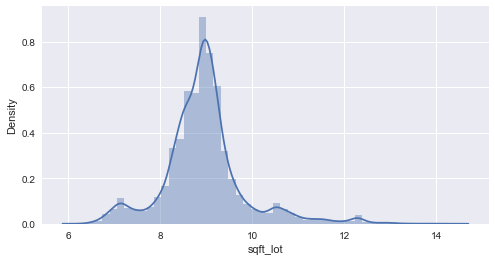

In [46]:
plt.figure(figsize=(8,4))
sns.distplot(df['sqft_lot'])
print("Skewness:", df['sqft_lot'].skew())
print("Kurtosis:", df['sqft_lot'].kurt())

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\15514\anaco

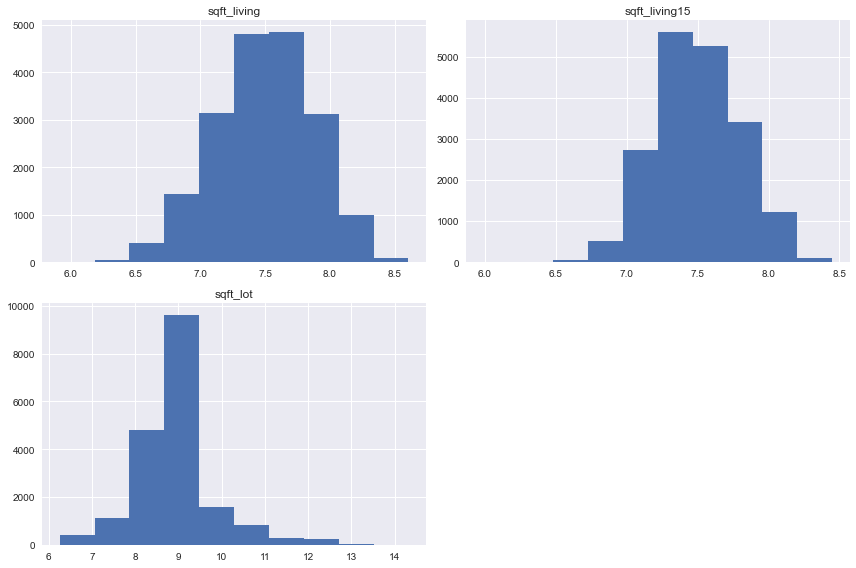

In [47]:
df[['sqft_lot','sqft_living','sqft_living15']].hist(figsize=(12, 8))
plt.tight_layout()

In [48]:
# save new dataset
# price by 1 std
# normalized all features given
df.to_csv('data/housing_aspects.csv')

# Bring in df with all encoded categorical features and interactions, quantile transform the data, save it, test final model

In [49]:
df3 = pd.read_pickle('df_dummy_and_interactions.pkl')

In [50]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21040 entries, 0 to 21596
Data columns (total 34 columns):
price               21040 non-null float64
bedrooms            21040 non-null int64
bathrooms           21040 non-null float64
sqft_living         21040 non-null int64
sqft_lot            21040 non-null int64
floors              21040 non-null float64
waterfront          21040 non-null float64
view                21040 non-null float64
yr_built            21040 non-null int64
yr_renovated        21040 non-null float64
lat                 21040 non-null float64
long                21040 non-null float64
sqft_living15       21040 non-null int64
sqft_lot15          21040 non-null int64
gr_4                21040 non-null uint8
gr_5                21040 non-null uint8
gr_6                21040 non-null uint8
gr_7                21040 non-null uint8
gr_8                21040 non-null uint8
gr_9                21040 non-null uint8
gr_10               21040 non-null uint8
gr_11         

In [51]:
std = df3.price.std()
print('std: ',std)
mean = df3.price.mean()
print('mean: ', mean)
std_1 = mean + std
std_1m = mean - std
print('mean +1 std: ',std_1)
print('mean -1 std: ',std_1m)

std:  256553.4734687195
mean:  504326.99762357416
mean +1 std:  760880.4710922936
mean -1 std:  247773.52415485468


In [52]:
df3.price.min()

78000.0

In [53]:
df3 = df3.loc[(df3['price']<std_1) & (df3['price']>std_1m)]
df3.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,yr_built,yr_renovated,...,condit_2,condit_3,condit_4,condit_5,class_middle,class_upper,dist_to_seattle,dist_to_bellevue,interaction_dist,interaction_bb
count,15867.000000,15867.000000,15867.000000,15867.000000,1.586700e+04,15867.000000,15867.000000,15867.000000,15867.000000,15867.000000,...,15867.000000,15867.000000,15867.000000,15867.000000,15867.000000,15867.000000,15867.000000,15867.000000,15867.000000,15867.000000
mean,455054.161845,3.306989,2.047725,1925.445075,1.406182e+04,1.485757,0.002017,0.143379,1971.891536,51.651478,...,0.005798,0.659545,0.260037,0.073612,0.698998,0.008130,18.759859,17.651508,408.274756,7.020120
std,137179.019321,0.839647,0.642228,659.511553,3.724996e+04,0.545762,0.044865,0.574842,29.184235,316.766885,...,0.075927,0.473877,0.438668,0.261146,0.458708,0.089803,10.661958,8.696739,442.985911,3.291366
min,247800.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1900.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.355938,0.662987,6.831179,0.500000
25%,339950.000000,3.000000,1.750000,1440.000000,4.890500e+03,1.000000,0.000000,0.000000,1952.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.791792,11.975168,118.714831,4.500000
50%,435000.000000,3.000000,2.250000,1850.000000,7.334000e+03,1.000000,0.000000,0.000000,1976.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,16.908554,15.453618,231.446475,7.000000
75%,555000.000000,4.000000,2.500000,2340.000000,1.008450e+04,2.000000,0.000000,0.000000,1998.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,25.465220,21.295250,490.557776,9.750000
max,760750.000000,6.000000,4.250000,5461.000000,1.651359e+06,3.500000,1.000000,4.000000,2015.000000,2015.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,76.917427,66.651354,5126.650671,24.000000


C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\15514\anaco

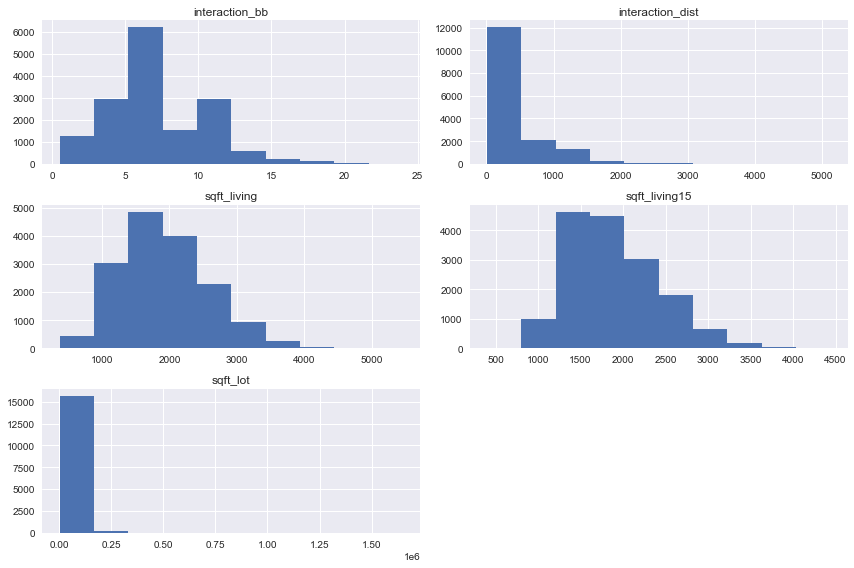

In [54]:
df3[['sqft_living','sqft_living15','sqft_lot','interaction_dist','interaction_bb']].hist(figsize=(12, 8))
plt.tight_layout()

In [57]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(output_distribution='normal')
df3['qt_sqft_living'] = qt.fit_transform(df3[['sqft_living']])
df3['qt_sqft_living15'] = qt.fit_transform(df3[['sqft_living15']])
df3['qt_sqft_lot'] = qt.fit_transform(df3[['sqft_lot']])
df3['qt_interaction_dist'] = qt.fit_transform(df3[['interaction_dist']])
df3['qt_interaction_bb'] = qt.fit_transform(df3[['interaction_bb']])

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\15514\anaco

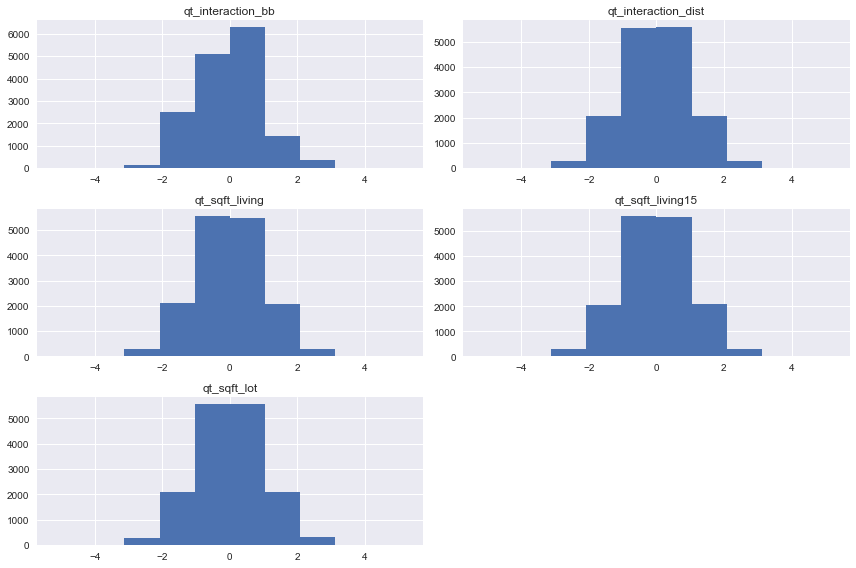

In [58]:
df3[['qt_sqft_living','qt_sqft_living15','qt_sqft_lot','qt_interaction_dist','qt_interaction_bb']].hist(figsize=(12, 8))
plt.tight_layout()

In [59]:
df3.to_pickle('final_df.pkl')